<a href="https://colab.research.google.com/github/ssssihoon/WE_IT/blob/main/Data_analysis/7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 정제

빠진 데이터나 이상한 데이터를 제거한다.

## 결측치 정제

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
pd.isna(df) # 결측치의 유무를 판단한다.

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
pd.isna(df).sum() # 결측치의 빈도를 확인한다.

sex      1
score    1
dtype: int64

결측치 제거

df.dropna(subset = ['컬럼명1'], ['컬럼명2'])

In [ ]:
df_nomiss = df.dropna(subset = ['score']) # score라는 컬럼명의 결측치를 제거한다.

모든 변수에 결측치가 없는 행만 남기기

df_nomiss = df.dropna()

## 결측치 대체

df.fillna(대체값)

## 이상치 정제

이상치 : 정상 범위에서 크게 벗어난 값

In [5]:
# df
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [6]:
# 이상치 확인
df['sex'].value_counts().sort_index()
# 성별에 남(1), 여(2) 인데 3인 값이 들어와 있는 상태이다 이것을 제거 예정

1    3
2    2
3    1
Name: sex, dtype: int64

### 이상치를 결측값으로 처리

In [7]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df #np.where()을 이용해 결측값으로 처리

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


결측값을 제거

In [10]:
df = df.dropna()
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
4,2.0,2
5,1.0,6


np.where()은 np.nan으로 지정하면 nan의 값을 갖게 된다.

이 때 df.isna()로 결측값의 유무를 찾으면 nan은 False의 값을 갖게된다. (isna함수에 한 해 결측값이 아니라고 판별됨.)

그러므로 df.replace()를 이용해 np.nan으로 바꿔줘야 한다.

## 극단치 제거

In [11]:
#df

mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WE_IT_DATA_ANALYSIS/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<Axes: ylabel='hwy'>

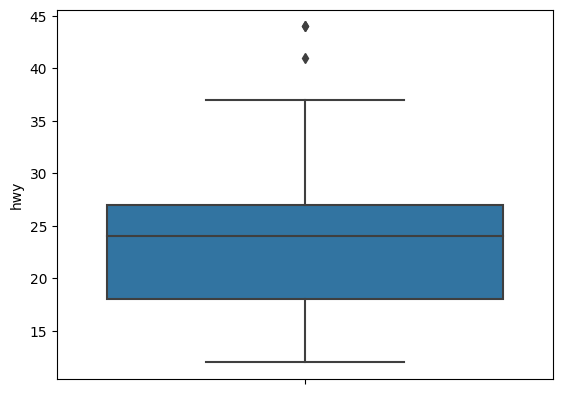

In [12]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy') #hwy 변수를 이용한 박스그래프
# 결과가 위에 점 두개가 보이듯 극단치가 발생했다.

극단치 기준값 구하기

1. 1사분위수, 3사분위수 구하기    df.quantile(.백분위)

In [13]:
pct25 = mpg['hwy'].quantile(.25)
pct25 #하위 25%에 해당하는 값 구하기 -> 1사분위수 라고 부름

18.0

In [14]:
pct75 = mpg['hwy'].quantile(.75)
pct75 #하위 75%에 해당하는 값 구하기 -> 3사분위수 라고 부름

27.0

2. IQR 구하기

iqr = pct75 - pct25

iqr은 1사분위수와 3사분위수의 차이를 나타낸다.

In [16]:
iqr = pct75 - pct25
iqr

9.0

3. 하한, 상한 구하기

하한 : 1사분위수보다 IQR의 1.5배 만큼 더 작은 값

상한 : 3사분위수보다 IQR의 1.5배 만큼 더 큰 값

In [17]:
pct25 - (1.5 * iqr) #하한

4.5

In [18]:
pct75 + (1.5 * iqr) #상한

40.5

극단치를 결측 처리 -> np.where() 이용

In [20]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                      np.nan, mpg['hwy'])
# 범위를 벗어나면 결측 처리

mpg['hwy'].isna().sum() # 결측값의 개수

3

결측값 제거

In [ ]:
mpg.dropna(subset = ['hwy'])